# investigate the correlation of flow porfile accuracy and tt prediction accuray with respect to each obstacle 

## preparations

In [25]:

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_theme()

In [26]:
# data source files
tt_acc_path = 'tmp/baselines_tt_acc.csv'
fpf_acc_path = 'tmp/baseline_pf_iou_same_obs.csv'

In [ ]:
# load and process the tt accuracy table
tt_acc = pd.read_csv(tt_acc_path)
print('Loaded tt accuracy table:')
print(tt_acc, '\n')

# keep only the sample index and the accuracies
tt_acc = tt_acc[tt_acc['model'] == 'ceyenet']
tt_acc = tt_acc[tt_acc['threshold'] == .025]
tt_acc = tt_acc[['sample', 'accuracy']].sort_values(by='sample').reset_index(drop=True)
tt_acc = tt_acc.rename(columns={'accuracy': 'tt_acc@ET=0.025'})
print('Processed tt accuracy table:')
print(tt_acc, '\n')


In [ ]:
# load the flow profile accuracy table, but process later for each evaluation
fpf_acc = pd.read_csv(fpf_acc_path)
print("Loaded flow profile accuracy table:")
print(fpf_acc)

## evaluation 1: group by sample and take the mean

Processed flow profile accuracy table:
     sample   fpf_acc
0         0  0.945137
1         1  0.919778
2         2  0.880303
3         3  0.926381
4         4  0.912950
..      ...       ...
995     995  0.941488
996     996  0.893563
997     997  0.920218
998     998  0.913783
999     999  0.888351

[1000 rows x 2 columns]
Merged accuracy table:
     sample  tt_acc@ET=0.025   fpf_acc
0         1           0.8449  0.919778
1         2           0.7706  0.880303
2         3           0.7976  0.926381
3         4           0.8707  0.912950
4         5           0.8331  0.939184
..      ...              ...       ...
994     995           0.8208  0.941488
995     996           0.8486  0.893563
996     997           0.8350  0.920218
997     998           0.7522  0.913783
998     999           0.8269  0.888351

[999 rows x 3 columns] 



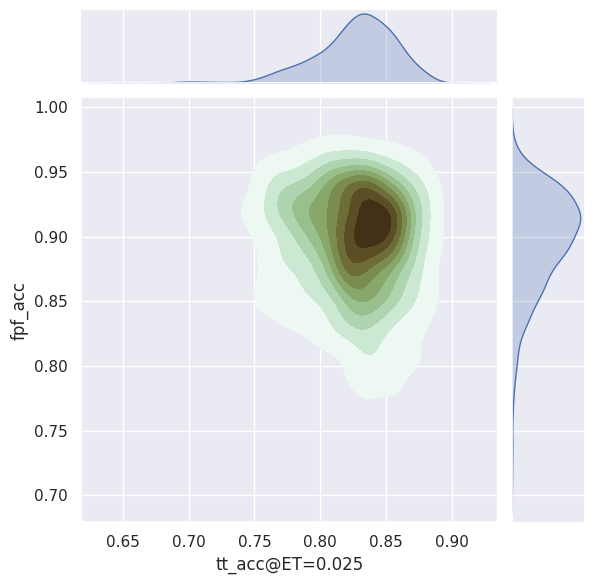

In [ ]:
fpf_acc_1 = fpf_acc[(fpf_acc["model"] == "CEyeNet") & (fpf_acc["obstacles"] == 8)]
fpf_acc_1 = fpf_acc_1[["chn_index", "IoU"]]
fpf_acc_1 = fpf_acc_1.groupby("chn_index").mean().reset_index()
fpf_acc_1 = fpf_acc_1.rename(columns={"chn_index": "sample", "IoU": "fpf_acc"})
print("Processed flow profile accuracy table:")
print(fpf_acc_1)

# merge the two tables
acc = tt_acc.merge(fpf_acc_1, on='sample')
print('Merged accuracy table:')
print(acc, '\n')

cmap = sns.cubehelix_palette(start=10, light=1, as_cmap=True)
# plot the accuracies
sns.jointplot(data=acc, x='tt_acc@ET=0.025', y='fpf_acc', cmap=cmap, fill=True, kind='kde')

## evaluation 2: plot the accuracies for each pin

/tmp/ipykernel_18346/1204596691.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  fpf_acc_2.rename(columns={"chn_index": "sample", "IoU": "fpf_acc"}, inplace=True)
/tmp/ipykernel_18346/1204596691.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  fpf_acc_2.drop(columns=["model", "obstacles"], inplace=True)


      sample  tt_acc@ET=0.025     pin   fpf_acc
0          1           0.8449    0-24  0.986599
1          1           0.8449   19-43  0.973027
2          1           0.8449   38-62  0.973906
3          1           0.8449   57-81  0.983096
4          1           0.8449  76-100  0.991218
...      ...              ...     ...       ...
4990     999           0.8269    0-24  0.976230
4991     999           0.8269   19-43  0.970499
4992     999           0.8269   38-62  0.983069
4993     999           0.8269   57-81  0.986723
4994     999           0.8269  76-100  0.989130

[4995 rows x 4 columns]


/tmp/ipykernel_18346/1204596691.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  fpf_acc_2.rename(columns={"chn_index": "sample", "IoU": "fpf_acc"}, inplace=True)
/tmp/ipykernel_18346/1204596691.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  fpf_acc_2.drop(columns=["model", "obstacles"], inplace=True)


      sample  tt_acc@ET=0.025     pin   fpf_acc
0          1           0.8449    0-24  0.981489
1          1           0.8449   19-43  0.955974
2          1           0.8449   38-62  0.968849
3          1           0.8449   57-81  0.975022
4          1           0.8449  76-100  0.988645
...      ...              ...     ...       ...
4990     999           0.8269    0-24  0.974346
4991     999           0.8269   19-43  0.956711
4992     999           0.8269   38-62  0.975034
4993     999           0.8269   57-81  0.980000
4994     999           0.8269  76-100  0.981853

[4995 rows x 4 columns]


/tmp/ipykernel_18346/1204596691.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  fpf_acc_2.rename(columns={"chn_index": "sample", "IoU": "fpf_acc"}, inplace=True)
/tmp/ipykernel_18346/1204596691.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  fpf_acc_2.drop(columns=["model", "obstacles"], inplace=True)


      sample  tt_acc@ET=0.025     pin   fpf_acc
0          1           0.8449    0-24  0.970665
1          1           0.8449   19-43  0.953117
2          1           0.8449   38-62  0.964206
3          1           0.8449   57-81  0.963835
4          1           0.8449  76-100  0.985848
...      ...              ...     ...       ...
4990     999           0.8269    0-24  0.960405
4991     999           0.8269   19-43  0.943282
4992     999           0.8269   38-62  0.966321
4993     999           0.8269   57-81  0.973129
4994     999           0.8269  76-100  0.971101

[4995 rows x 4 columns]


/tmp/ipykernel_18346/1204596691.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  fpf_acc_2.rename(columns={"chn_index": "sample", "IoU": "fpf_acc"}, inplace=True)
/tmp/ipykernel_18346/1204596691.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  fpf_acc_2.drop(columns=["model", "obstacles"], inplace=True)


      sample  tt_acc@ET=0.025     pin   fpf_acc
0          1           0.8449    0-24  0.959190
1          1           0.8449   19-43  0.943231
2          1           0.8449   38-62  0.959256
3          1           0.8449   57-81  0.950520
4          1           0.8449  76-100  0.982724
...      ...              ...     ...       ...
4990     999           0.8269    0-24  0.945636
4991     999           0.8269   19-43  0.920640
4992     999           0.8269   38-62  0.956339
4993     999           0.8269   57-81  0.961937
4994     999           0.8269  76-100  0.956504

[4995 rows x 4 columns]


/tmp/ipykernel_18346/1204596691.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  fpf_acc_2.rename(columns={"chn_index": "sample", "IoU": "fpf_acc"}, inplace=True)
/tmp/ipykernel_18346/1204596691.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  fpf_acc_2.drop(columns=["model", "obstacles"], inplace=True)


      sample  tt_acc@ET=0.025     pin   fpf_acc
0          1           0.8449    0-24  0.940554
1          1           0.8449   19-43  0.929103
2          1           0.8449   38-62  0.953364
3          1           0.8449   57-81  0.936127
4          1           0.8449  76-100  0.978960
...      ...              ...     ...       ...
4990     999           0.8269    0-24  0.927944
4991     999           0.8269   19-43  0.895188
4992     999           0.8269   38-62  0.944098
4993     999           0.8269   57-81  0.950932
4994     999           0.8269  76-100  0.939054

[4995 rows x 4 columns]


/tmp/ipykernel_18346/1204596691.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  fpf_acc_2.rename(columns={"chn_index": "sample", "IoU": "fpf_acc"}, inplace=True)
/tmp/ipykernel_18346/1204596691.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  fpf_acc_2.drop(columns=["model", "obstacles"], inplace=True)


      sample  tt_acc@ET=0.025     pin   fpf_acc
0          1           0.8449    0-24  0.928128
1          1           0.8449   19-43  0.912545
2          1           0.8449   38-62  0.943113
3          1           0.8449   57-81  0.918648
4          1           0.8449  76-100  0.973097
...      ...              ...     ...       ...
4990     999           0.8269    0-24  0.905923
4991     999           0.8269   19-43  0.874907
4992     999           0.8269   38-62  0.927806
4993     999           0.8269   57-81  0.935665
4994     999           0.8269  76-100  0.919459

[4995 rows x 4 columns]


/tmp/ipykernel_18346/1204596691.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  fpf_acc_2.rename(columns={"chn_index": "sample", "IoU": "fpf_acc"}, inplace=True)
/tmp/ipykernel_18346/1204596691.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  fpf_acc_2.drop(columns=["model", "obstacles"], inplace=True)


      sample  tt_acc@ET=0.025     pin   fpf_acc
0          1           0.8449    0-24  0.907010
1          1           0.8449   19-43  0.898117
2          1           0.8449   38-62  0.933673
3          1           0.8449   57-81  0.899051
4          1           0.8449  76-100  0.961038
...      ...              ...     ...       ...
4990     999           0.8269    0-24  0.879777
4991     999           0.8269   19-43  0.848890
4992     999           0.8269   38-62  0.897149
4993     999           0.8269   57-81  0.919840
4994     999           0.8269  76-100  0.896098

[4995 rows x 4 columns]


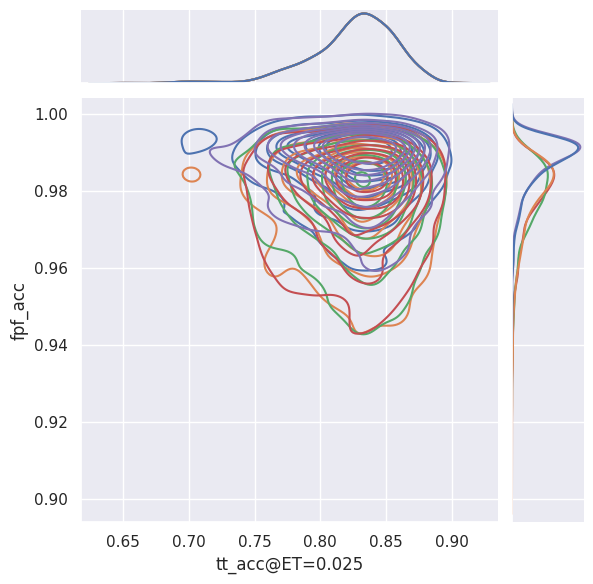

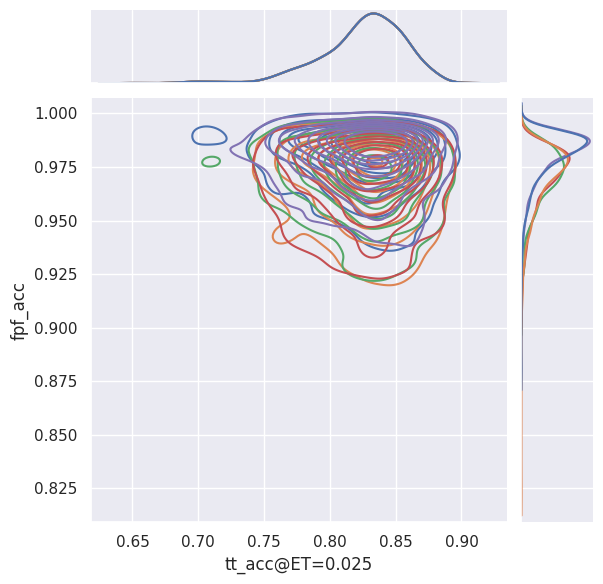

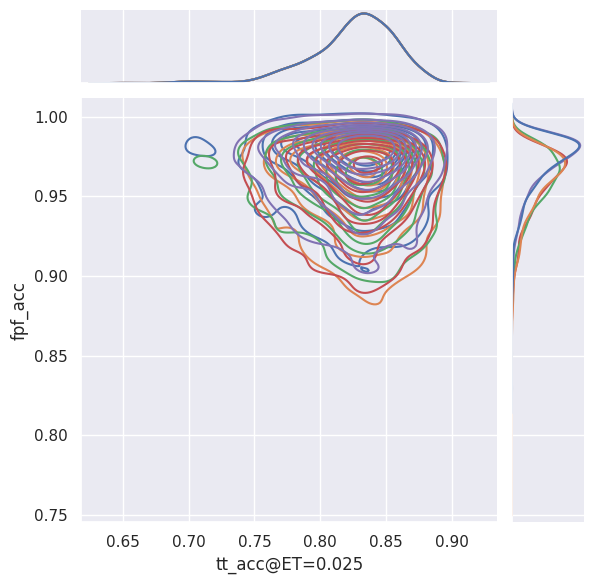

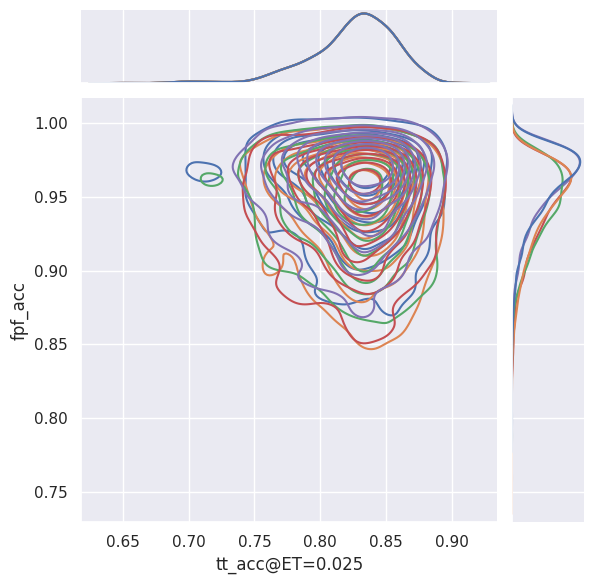

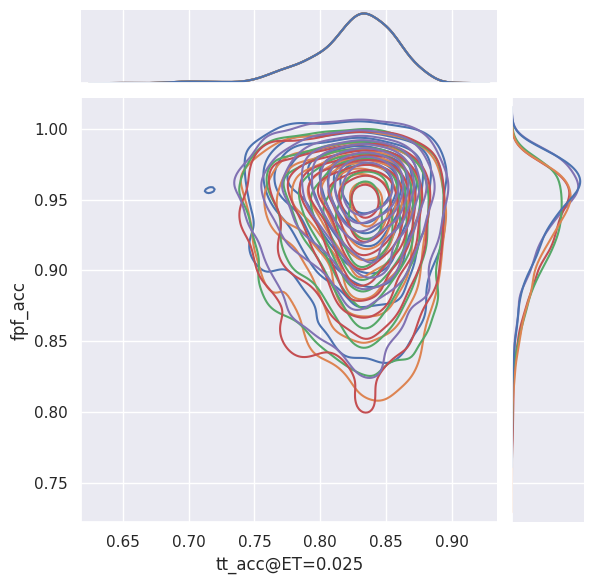

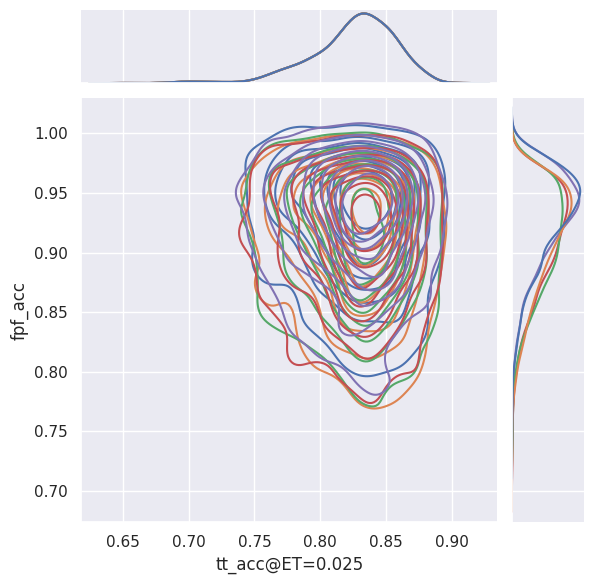

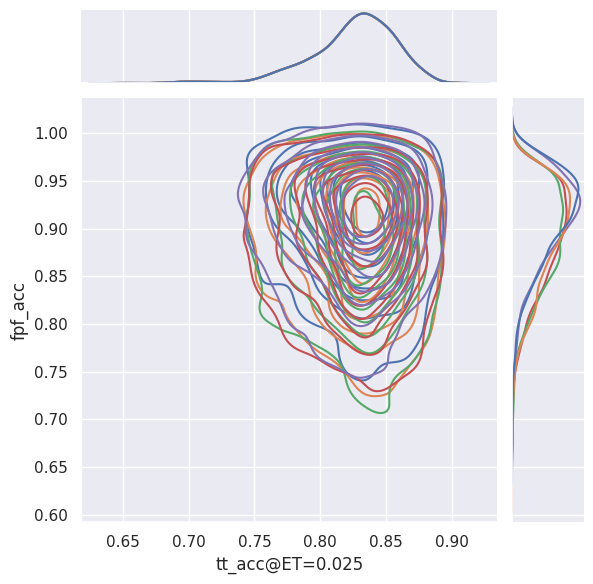

In [ ]:
def plot_acc(fpf_acc, tt_acc, obstacles):
    fpf_acc_2 = fpf_acc[(fpf_acc["model"] == "CEyeNet") & (fpf_acc["obstacles"] == obstacles)]
    fpf_acc_2.rename(columns={"chn_index": "sample", "IoU": "fpf_acc"}, inplace=True)
    fpf_acc_2.drop(columns=["model", "obstacles"], inplace=True)
    acc = tt_acc.merge(fpf_acc_2, on='sample', how='inner')
    print(acc)
    fg = sns.jointplot(data=acc, x='tt_acc@ET=0.025', y='fpf_acc', kind='kde', hue='pin', legend=False)
    return fg

for i in range(2, 9):
    fg = plot_acc(fpf_acc, tt_acc, i)
    # sns.move_legend(fg.ax_joint, loc='lower left')
    plt.savefig(f'tmp/acc_jointplot_same_{i}.png', dpi=600)
    # break

In [ ]:
fpf_acc_2 = fpf_acc[(fpf_acc["model"] == "CEyeNet")]
fpf_acc_2.rename(columns={"chn_index": "sample", "IoU": "fpf_acc"}, inplace=True)
fpf_acc_2.drop(columns=["model"], inplace=True)
acc = tt_acc.merge(fpf_acc_2, on="sample", how="inner")
print(acc)
fg = sns.jointplot(data=acc, x="tt_acc@ET=0.025", y="fpf_acc", kind="kde", hue="pin", col="obstacles", col_wrap=2)

# Find the obstacles with best/worst prediction accuracy 

In [1]:
# preparation
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import os, sys
sys.path.append('../')
# load the tt & fpf accuracy tables
tt_acc = pd.read_csv('../tmp/baselines_tt_acc.csv')
tt_acc = tt_acc[tt_acc['model'] == 'ceyenet']
tt_acc = tt_acc[tt_acc['threshold'] == .025]
tt_acc.drop(columns=['model', 'threshold'], inplace=True)
tt_acc.rename(columns={'accuracy': 'tt_acc@ET=0.025'}, inplace=True)

fpf_acc_same = pd.read_csv('../tmp/baseline_pf_iou_same_obs.csv')
fpf_acc_same = fpf_acc_same[(fpf_acc_same['model'] == 'CEyeNet') & (fpf_acc_same['obstacles'] == 8)]
fpf_acc_same.drop(columns=['model', 'obstacles'], inplace=True)
fpf_acc_same.rename(columns={'chn_index': 'sample', 'IoU': 'fpf_acc@obs=8'}, inplace=True)

# prepare the accuracy table
print('Loaded tt accuracy table:')
print(tt_acc, '\n')
print('Loaded flow profile accuracy tables (for same obstacles):')
print(fpf_acc_same, '\n')



Loaded tt accuracy table:
       sample  tt_acc@ET=0.025
9158      798           0.6488
9387      985           0.6782
9512      772           0.6894
9569      584           0.6946
9574      292           0.6949
...       ...              ...
16305     719           0.8836
16332     744           0.8839
16370     337           0.8844
16521     733           0.8867
17988     672           0.9040

[1000 rows x 2 columns] 

Loaded flow profile accuracy tables (for same obstacles):
           pin  sample  fpf_acc@obs=8
8000      0-24       0       0.959214
8001      0-24       1       0.907010
8002      0-24       2       0.893978
8003      0-24       3       0.893756
8004      0-24       4       0.955620
...        ...     ...            ...
116995  76-100     995       0.954205
116996  76-100     996       0.961471
116997  76-100     997       0.943540
116998  76-100     998       0.928418
116999  76-100     999       0.896098

[5000 rows x 3 columns] 



In [2]:
# collect the obstacle ranks for each accuracy
obs_id_ranks = pd.DataFrame()
acc_ranks = pd.DataFrame()

tt_acc = tt_acc.sort_values(by='tt_acc@ET=0.025', ascending=False).reset_index(drop=True)
obs_id_ranks['tt_rank'] = tt_acc['sample']
acc_ranks['tt_rank'] = tt_acc['tt_acc@ET=0.025']

for pin in ['0-24', '19-43', '38-62', '57-81', '76-100']:
    fpf_acc_same_pin = fpf_acc_same[fpf_acc_same['pin'] == pin]
    fpf_acc_same_pin = fpf_acc_same_pin.sort_values(by='fpf_acc@obs=8', ascending=False).reset_index(drop=True)
    obs_id_ranks[f'fpf_pin={pin}'] = fpf_acc_same_pin['sample']
    acc_ranks[f'fpf_pin={pin}'] = fpf_acc_same_pin['fpf_acc@obs=8']

fpf_acc_same_mean = fpf_acc_same.groupby('sample').mean(numeric_only=True).reset_index()
fpf_acc_same_mean = fpf_acc_same_mean.sort_values(by='fpf_acc@obs=8', ascending=False).reset_index(drop=True)
obs_id_ranks['fpf_mean'] = fpf_acc_same_mean['sample']
acc_ranks['fpf_mean'] = fpf_acc_same_mean['fpf_acc@obs=8']
print('Collected obs_id ranks:')
print(obs_id_ranks, '\n')
print('Collected accuracy ranks:')
print(acc_ranks, '\n')

obs_id_ranks.to_csv('../tmp/obs_id_ranks.csv', index=True)
acc_ranks.to_csv('../tmp/acc_ranks.csv', index=True)


Collected obs_id ranks:
     tt_rank  fpf_pin=0-24  fpf_pin=19-43  fpf_pin=38-62  fpf_pin=57-81  \
0        672           699             85            775            921   
1        733           366            361            185            316   
2        337            85            518            360            442   
3        744           377            907            759            386   
4        719            37            495            869            345   
..       ...           ...            ...            ...            ...   
995      292           886            692             45            173   
996      584           584            501            285            584   
997      772           952            931            913            426   
998      985           692            285            931            913   
999      798           285            584            583            583   

     fpf_pin=76-100  fpf_mean  
0               188       185  
1          

In [4]:

from utils.io import find_index

# plot grids of the obstacles according to the ranks
obstacle_dir = '../../dataset/obs_img'
obstacle_list = os.listdir(obstacle_dir)
obstacle_list.remove('.ipynb_checkpoints')
obstacle_list.sort(key=find_index)

obs_to_plot = obs_id_ranks.iloc[995:, 0:].values.flatten()
accs_to_plot = acc_ranks.iloc[995:, 0:].values.flatten()

fig, axs = plt.subplots(5, 7, figsize=(14, 12.5), dpi=600)

for i, obs_id in enumerate(obs_to_plot):
    obs_path = os.path.join(obstacle_dir, obstacle_list[obs_id])
    obs = plt.imread(obs_path)
    axs[i//7, i%7].imshow(obs, aspect='auto')
    axs[i//7, i%7].axis('off')
    axs[i//7, i%7].set_title(f'Obs_id {obs_id}\nAcc: {accs_to_plot[i]:.3f}')
plt.tight_layout()
plt.savefig('../tmp/lowest_obs_ranks.png', dpi=600)
plt.close()


In [12]:
# plot equally spaced ranks
from utils.io import find_index

# plot grids of the obstacles according to the ranks
obstacle_dir = '../../dataset/obs_img'
obstacle_list = os.listdir(obstacle_dir)
obstacle_list.remove('.ipynb_checkpoints')
obstacle_list.sort(key=find_index)


obs_selection = np.linspace(0,999,11)
obs_to_plot = obs_id_ranks.iloc[obs_selection, -1].values.flatten()
accs_to_plot = acc_ranks.iloc[obs_selection, -1].values.flatten()

fig, axs = plt.subplots(1, 11, figsize=(22, 2.2), dpi=600)

for i, obs_id in enumerate(obs_to_plot):
    obs_path = os.path.join(obstacle_dir, obstacle_list[obs_id])
    obs = plt.imread(obs_path)
    axs[i].imshow(obs, aspect='auto')
    axs[i].axis('off')
    axs[i].set_title(f'{obs_id}\n{accs_to_plot[i]:.3f}')
plt.tight_layout()
plt.savefig('../tmp/fpf_acc_obs_ranks.png', dpi=600)
plt.close()

print(obs_to_plot)

[185 725 978  12 948 552 510 190 574 632 584]


# plot accuracy and inference time of baseline models

In [ ]:
SNS_PASTEL = {
    "blue": "#A1C9F4",
    "orange": "#FFB482",
    "green": "#8DE5A1",
    "red": "#FF9F9B",
    "purple": "#D0BBFF",
    "brown": "#DEBB9B",
    "pink": "#FAB0E4",
    "gray": "#CFCFCF",
    "yellow": "#FFFEA3",
    "light_blue": "#B9F2F0",
}


def acc_time_models():
    import matplotlib.pyplot as plt
    import numpy as np
    import pandas as pd

    selected_bnf = 96
    data_chart_path = "model benchmark stats.xlsx"

    mean = pd.read_excel(data_chart_path, sheet_name="reception_field_mean", header=0)
    mean = mean[mean["base_num_features"] == selected_bnf]
    std = pd.read_excel(data_chart_path, sheet_name="reception_field_std", header=0)
    std = std[std["base_num_features"] == selected_bnf]
    m_acc = mean[0.025]
    m_time = mean["infer time"]
    std_acc = std[0.025]
    std_time = std["infer time"]

    acc_color = SNS_PASTEL["blue"]
    t_color = SNS_PASTEL["red"]
    x = np.arange(len(m_acc))
    x_ticks = mean["threshold"]
    # Adjust the x values for each set of bars
    x1 = x - 0.2  # Shift first set of bars to the left
    x2 = x + 0.2  # Shift second set of bars to the right

    plt.rcParams.update({"font.size": 8})
    # Create the main plot
    fig, ax1 = plt.subplots(figsize=(5, 3), dpi=600)
    # set default font size to 9
    ax1.bar(
        x1,
        m_acc,
        width=0.4,
        color=acc_color,
        align="center",
        label="accuracy",
        yerr=std_acc,
        capsize=4,
    )
    ax1.set_xlabel("models")
    ax1.set_xticks(x)
    ax1.set_xticklabels(x_ticks, rotation=-20, ha="left")
    ax1.set_ylabel("Accuracy at ET=0.025", color=acc_color)

    # Create the twin Axes (second y-axis)
    ax2 = ax1.twinx()
    ax2.bar(
        x2,
        m_time,
        width=0.4,
        color=t_color,
        align="center",
        label="infer time",
        yerr=std_time,
        capsize=4,
    )
    ax2.set_ylabel("infer time per sample (ms)", color=t_color)

    # Customize the plot as needed
    ax1.legend(loc="upper left", bbox_to_anchor=(0, 1))
    ax2.legend(loc="upper left", bbox_to_anchor=(0, 0.9))
    plt.tight_layout()
    plt.show()

# histogram of element values of 100 tt

In [ ]:
import random

def histogram_of_tt():
    tt_dir = r"../obs_frameworks/tt_zigzag_200"
    bin = np.array([i for i in range(200)])
    tt_list = os.listdir(tt_dir)
    tt_list = random.sample(tt_list, 100)
    hists = []
    cm = plt.get_cmap("PuBu")

    for ttp in tt_list:
        tt_path = os.path.join(tt_dir, ttp)
        tt = np.load(tt_path)
        hist_values, _ = np.histogram(tt, bins=bin)
        hists.append(hist_values)

    for i, hist in enumerate(hists):
        plt.step(
            bin[:-1],
            hist,
            color=cm(i / 100 * 0.6 + 0.1),
            linewidth=1,
        )

    # plt.yscale('log')
    plt.xlabel("element value")
    plt.ylabel("frequency")
    plt.savefig("hist_of_100_tt_2.png", dpi=600)

# boxplot of testset accuracy of models

In [ ]:

def box_plot_testset_acc():
    import seaborn as sns
    import matplotlib.pyplot as plt
    import os
    import pandas as pd
    import numpy as np

    data_dir = "../Outputs/testset_acc_baselines"
    data_series_name = os.path.basename(data_dir)
    data_paths = os.listdir(data_dir)
    testset_acc = pd.DataFrame(columns=["model", "sample", "threshold", "accuracy"])
    for dpth in data_paths:
        model_name = dpth.split("_")[0]
        acc_rec = pd.read_csv(
            os.path.join(data_dir, dpth), names=np.linspace(0.2, 0, 9)
        )
        acc_rec["sample"] = np.arange(1, acc_rec.shape[0] + 1)
        acc_rec_long = acc_rec.melt(
            id_vars="sample", var_name="threshold", value_name="accuracy"
        )
        # add a new column for model name and set all values to the model name
        acc_rec_long["model"] = model_name
        # change sequence of columns
        acc_rec_long = acc_rec_long[["model", "sample", "threshold", "accuracy"]]
        testset_acc = pd.concat([testset_acc, acc_rec_long])
    testset_acc["threshold"] = testset_acc["threshold"].astype(float).round(3)
    testset_acc.sort_values(by="accuracy", ascending=True, inplace=True)
    testset_acc.to_csv(
        os.path.join(data_dir, "..", data_series_name + ".csv"), index=False
    )
    sns.set_theme(style="ticks", palette="pastel")
    sns.boxplot(
        x="threshold",
        y="accuracy",
        hue="model",
        hue_order=["unpp", "gvtn", "ceyenet"],
        data=testset_acc,
    )
    sns.despine(offset=10, trim=True)
    plt.show()

# profile prediction accuracies of baseline models

In [ ]:

def line_plot_baseline_profile_acc(data_path, save_path):
    import seaborn as sns
    import matplotlib.pyplot as plt
    import numpy as np
    import pandas as pd

    sns.set_theme(style="ticks", palette="pastel")
    sns.set_context("paper", font_scale=1.5)
    # plot the baseline model profile accuracies

    # convert dataset from from mixed form to long.
    ious = pd.read_csv(data_path, header=0)
    fg = sns.relplot(
        data=ious,
        x="obstacles",
        y="IoU",
        hue="model",
        kind="line",
        markers=True,
        errorbar="sd",
    )
    # set figure size
    plt.savefig(save_path, dpi=600)


# profile pixel travel range

In [ ]:
def pix_travel_range():
    """
    1. generate a list of random obs sequences, save it to a file.
    2. form the resultant tt, plot the tt and the norm.
    3. evaluate the level of randomness of each resultant tt by mean std, max.
    """
    import os
    import numpy as np
    import matplotlib.pyplot as plt
    from tqdm import tqdm
    from tqdm.auto import trange
    import pandas as pd

    from utils.utils import mkdirs
    from data.dataset import FDataset
    from utils.data_process import tt_convert, tt_synth
    from utils.visualization import plot_tt_vf

    obs_img_dir = r"../dataset/obs_imgs"
    tt_dir = r"../dataset/tt"

    def p_range_data(dir, sname, seq_len, seed_num):
        root_dir = os.path.join(dir, sname)
        tt_img_dir = os.path.join(root_dir, "tt_img")
        mkdirs(tt_img_dir)
        norm_img_dir = os.path.join(root_dir, "norm_img")
        mkdirs(norm_img_dir)

        seq = (np.random.rand(seed_num, seq_len) * 8999).round().astype("int16")
        seq_table = pd.DataFrame(seq, columns=np.arange(seq_len))
        table_path = os.path.join(root_dir, sname + ".xlsx")

        seq_prcs = []
        stats = pd.DataFrame(columns=["idx", "mean", "std", "max", "grad-mean"])
        data = FDataset(obs_img_dir, tt_dir)

        for i in tqdm(range(seed_num), leave=False):
            tt_list = []
            stp_prcs = []
            for j, idx in enumerate(seq[i]):
                _, tt = data.__getitem__(idx)
                trans_flag = ""
                if np.random.randn() > 0.5:
                    tt = tt_convert(tt, False, True)
                    trans_flag = "vert"
                stp_prcs.append(trans_flag)
                tt_list.append(tt.transpose(1, 2, 0).round().astype("int16"))
            seq_prcs.append(stp_prcs)
            tt_fin = tt_synth(tt_list)
            norm = np.linalg.norm(tt_fin, axis=2)
            grad = np.stack(np.gradient(norm), axis=2)
            grad_norm = np.linalg.norm(grad, axis=2)
            stat = pd.DataFrame(
                {
                    "idx": [i],
                    "mean": [np.nanmean(norm)],
                    "std": [np.nanstd(norm)],
                    "max": [np.nanmax(norm)],
                    "grad-mean": [np.nanmean(grad_norm)],
                }
            )
            stats = pd.concat([stats, stat], ignore_index=True)

            fig, ax = plt.subplots(figsize=[5, 5], dpi=300, layout="tight")
            plot_tt_vf(tt_fin, ax, [20, 20])
            plt.savefig(os.path.join(tt_img_dir, f"tt_{i}.png"))
            ax.cla()
            im = ax.imshow(norm.T, origin="lower", cmap="rainbow", vmax=100)
            fig.colorbar(im, location="right")
            plt.savefig(os.path.join(norm_img_dir, f"n_{i}.png"))
            plt.close()
        seq_table.to_excel(table_path, sheet_name="obs_sequences")
        pd.DataFrame(seq_prcs).to_excel(os.path.join(root_dir, "seq_prcs.xlsx"))
        stats.to_excel(
            os.path.join(root_dir, sname + "_stat.xlsx"),
            sheet_name="stats",
        )
        return stats.mean(0, skipna=True)

    all_stats = pd.DataFrame()
    for j in trange(1, desc="repeat"):
        for i in trange(12, 13, desc="sample", leave=False):
            tqdm.write(f"\n{i}")
            stat = p_range_data(
                "other data/230220 p range", f"s{i}-grad", seq_len=i, seed_num=1
            )
            print("\n")
            all_stats = pd.concat([all_stats, stat], axis=1, ignore_index=True)
        (all_stats.T).to_excel(f"all_stats_{j}.xlsx")

# eval obstacle framework

In [ ]:
import os
import numpy as np
import pandas as pd
from tqdm import tqdm
from easydict import EasyDict
from itertools import product

from utils.io import find_index
from utils.data_process import tt_convert, tt_postprocess, tt_synth
from utils.utils import mkdirs

N_SEQUENCES = 1000
LEN_SEQUENCE = 8
POS_SWITCH = False
H_SYM_SWITCH = False
TT_DIR = r"../obs_frameworks//tt_pillar_200"
EXPORT_DIR = r"../obs_frameworks/eval_results/pillar"

In [ ]:
class ObsFrameWorkCharacterizer:
    def __init__(self, cfg) -> None:
        self.cfg = cfg
        mkdirs(self.cfg.export_dir)
        self.init_dataset()

    def sample(self):
        #  self.n_obstacles should be smaller than the total number of tt in the data_dir
        sequences = self.sampling_obstacle_sequences(
            self.n_obstacles,
            self.cfg.n_sequences,
            self.cfg.len_seq,
            self.cfg.pos_switch,
            self.cfg.h_sym_switch,
        )
        tt_all = []
        for seq in tqdm(sequences):
            seq_tt = []  # result tt for all the sub sequences.
            tt_list = [self.get_tt(*obstacle) for obstacle in seq]
            for i in range(len(tt_list)):
                result_tt = tt_synth(tt_list[: i + 1])
                seq_tt.append(result_tt)
            seq_tt = np.stack(seq_tt, axis=0)
            tt_all.append(seq_tt)
        # characterizing all the tt in the experiment.
        tt_all = np.stack(tt_all, axis=0)  # shape of [n_sequences, len_seq, H, W, 2]
        displacement = np.linalg.norm(tt_all, axis=-1).astype(np.float32)
        segregation = self.compute_pix_segeration(tt_all)
        dist_stats = self.compute_statistics(displacement)
        seg_stats = self.compute_statistics(segregation)

        # write the statistics, sequences, displ and seg to files.
        dist_stats = pd.DataFrame(dist_stats, columns=["mean", "std", "max", "median"])
        seg_stats = pd.DataFrame(seg_stats, columns=["mean", "std", "max", "median"])
        dist_stats.to_csv(os.path.join(self.cfg.export_dir, "displacement_stats.csv"))
        seg_stats.to_csv(os.path.join(self.cfg.export_dir, "segregation_stats.csv"))
        np.save(os.path.join(self.cfg.export_dir, "sequences.npy"), sequences)
        np.save(os.path.join(self.cfg.export_dir, "displacement.npy"), displacement)
        np.save(os.path.join(self.cfg.export_dir, "segregation.npy"), segregation)

    def init_dataset(self):
        self.data_list = os.listdir(self.cfg.tt_dir)
        if find_index(self.data_list[0]):
            self.data_list.sort(key=find_index)
        else:
            self.data_list.sort()
        self.total_data_num = len(self.data_list)
        n_obstacles = self.cfg.n_obstacles or self.total_data_num
        self.n_obstacles = min(self.total_data_num, n_obstacles)
        # write the dataset to file
        with open(os.path.join(self.cfg.export_dir, "dataset.txt"), "w") as f:
            for i, item in enumerate(self.data_list[: self.n_obstacles]):
                f.write(f"{i}:\t\t{item}\n")

    def get_tt(self, obs_index, pos, h_sym):
        tt_file = self.data_list[obs_index]
        tt = np.load(os.path.join(self.cfg.tt_dir, tt_file))
        res = tt.shape[0]
        if pos + h_sym:
            tt = tt_convert(tt, h_sym, pos)
        return tt_postprocess(tt)

    def compute_statistics(self, tts):
        """compute statistics of the displacement or segregation of each sub sequence"""
        mean = np.mean(tts, axis=(0, -2, -1))
        std = np.std(tts, axis=(0, -2, -1))
        max = np.max(tts, axis=(0, -2, -1))
        median = np.median(tts, axis=(0, -2, -1))
        return np.stack([mean, std, max, median], axis=-1)

    @staticmethod
    def sampling_obstacle_sequences(
        n_obstacles,
        n_sequences,
        seq_len,
        pos_switch: bool = False,
        h_sym_switch: bool = False,
    ):
        obs_indices = np.random.randint(0, n_obstacles, size=(n_sequences, seq_len))
        pos = np.random.randint(0, int(pos_switch) + 1, size=(n_sequences, seq_len))
        h_sym = np.random.randint(0, int(h_sym_switch) + 1, size=(n_sequences, seq_len))
        sequences = np.stack([obs_indices, pos, h_sym], axis=-1)
        return sequences

    @staticmethod
    def compute_pix_segeration(tts):
        """pixel segregation: per pixel; sum of norm of dispalcement differnece to up,down, left, right neighbours.
        tt should be shape of [(Seq, (Sub_length,))  H, W, 2].
        """

        def compute_diff(tts, axis, shift):
            roll_tts = np.roll(tts, shift, axis=axis)
            # set the row that roll-across-boundary to 0. i.e. if shift = 1, the first row will be set to 0. if shift = -1, the last row will be set to 0.
            slice_ = (
                (slice(None),) * (tts.ndim + axis)
                + (min(shift, 0),)
                + (slice(None),) * (-axis - 1)
            )
            roll_tts[slice_] = 0
            diff = np.linalg.norm(roll_tts - tts, axis=-1)
            return diff.astype(np.float32)

        seg = np.zeros(tts.shape[0:-1], dtype=np.float32)
        for axis, shift in product(
            [-3, -2], [-1, 1]
        ):  # the segregation to neighbours in H and W direction.
            seg += compute_diff(tts, axis, shift)

        return seg  # shape of [Seq, (Sub_length,) H, W]

In [ ]:
cfg = EasyDict()
cfg.tt_dir = TT_DIR
cfg.n_obstacles = None
cfg.n_sequences = N_SEQUENCES
cfg.len_seq = LEN_SEQUENCE
cfg.pos_switch = POS_SWITCH
cfg.h_sym_switch = H_SYM_SWITCH
cfg.export_dir = EXPORT_DIR
tt_characterize = ObsFrameWorkCharacterizer(cfg)
tt_characterize.sample()

# plot obstacle framework comparison


In [ ]:
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
import os, sys
matplotlib.use("Qt5Agg")
DATA_ROOT_DIR = r"../obs_framworks/eval_results"
OBS_TYPES = ["herringbone", "chevron", "pillar", "zigzag"]
COLORS = ["red", "purple", "blue", "green"]
RES = 200
DATA_TYPES = ["displacement", "segregation"]

In [ ]:
def preprocess_data():
    processed_data = {"displacement": [], "segregation": []}
    for data_type in DATA_TYPES:
        for channel_type in OBS_TYPES:
            # load the tts and keep only the max-len sequences
            last_tts = np.load(
                os.path.join(DATA_ROOT_DIR, channel_type, f"{data_type}.npy")
            )[:, -1, :, :]
            last_tts = last_tts.flatten()
            # shrink the size of the data
            last_tts = np.sort(last_tts)[::1000] / RES
            processed_data[data_type].append(last_tts)
            data = np.stack(processed_data[data_type], axis=1)
            np.save(
                os.path.join(DATA_ROOT_DIR, f"{data_type}_violin_plot_data.npy"), data
            )


def violin_plot(data, x_labels=OBS_TYPES, title="", violin_kwargs={}):
    if isinstance(data, str):
        data = np.load(data)
    matplotlib.rcParams.update({"font.size": 8})
    fig, ax = plt.subplots(figsize=(4, 3), dpi=300)
    plots = ax.violinplot(data, showmeans=False, showmedians=True, **violin_kwargs)
    fig.suptitle(title)

    for pc, color in zip(plots["bodies"], COLORS):
        pc.set_facecolor(color)
    plots["cmedians"].set_color(COLORS)
    plots["cmaxes"].set_color(COLORS)
    plots["cmins"].set_color(COLORS)
    plots["cbars"].set_color(COLORS)
    plt.xticks(ticks=[1, 2, 3, 4], labels=x_labels)
    plt.show()


def box_plot(data, x_labels=OBS_TYPES, title="", box_kwargs=None):
    if isinstance(data, str):
        data = np.load(data)
    matplotlib.rcParams.update({"font.size": 8})
    fig, ax = plt.subplots(figsize=(4, 3), dpi=300)
    # plots = ax.violinplot(data, showmeans=False, showmedians=True, **box_kwargs)
    plots = ax.boxplot(
        data,
    )
    fig.suptitle(title)
    plt.xticks(ticks=[1, 2, 3, 4], labels=x_labels)
    plt.show()

In [ ]:
preprocess_data(DATA_TYPES)
violin_plot(
    os.path.join(DATA_ROOT_DIR, "displacement_violin_plot_data.npy"),
    title="Displacement",
)


# evaluate predicted transformation tensors

In [ ]:
import os
from tools.eval import ModelEvaluator, list_models, load_cfg
from tqdm import tqdm
from config.config import Config

list_models(r"../log")
MODELS = [line.strip() for line in open(r"../log/model_path_list.txt", "r")]

OUTPUT_DIR = r"../Outputs"
cfg = Config()
cfg.__build_default__("eval")
cfg.eval_cfg.result_dir = OUTPUT_DIR

for i, model in tqdm(enumerate(MODELS), total=len(MODELS), desc=f"Models"):
    load_path = os.path.dirname(model)
    original_cfg = load_cfg(load_path)
    cfg.model = original_cfg.model
    cfg.profile_size = original_cfg.profile_size
    cfg.model_cfg = original_cfg.model_cfg

    cfg.data_cfg.compeye = original_cfg.data_cfg.compeye
    cfg.eval_cfg.infer_weight_path = model

    if i == 0:  # first run for heating up the GPU
        tqdm.write(f"{cfg}")
        mdev = ModelEvaluator(cfg)
        mdev.configure_output(False, False, False)
        mdev.evaluation()
        mdev.configure_output(True, False, False)
        mdev.evaluation()
    else:
        tqdm.write(f"\n......\n")
        mdev.cfg = cfg
        tqdm.write(f"{cfg}")
        mdev.create_loader()
        mdev.build_model()
        mdev.evaluation()

# evaluate predicted flow profiles

In [ ]:
import os
import numpy as np
import pickle
from tqdm import tqdm
import re
import pandas as pd

from utils.microfluidics import FlowSystem
from utils.data_process import gen_pin_tensor, p_transform, tt_convert
from tools.infer import TTPredictor
from tools.acc_metrics import calc_iou, calc_matching_rate
from utils.utils import mkdirs
from utils.io import create_infer_config_from_file

In [ ]:
def sample_testset_channel(n_chn, n_obs, out_dir=None, random=True):
    """sample n_chn channel structures from the testset.
    If out_dir is provided, return the path to the saved tables. If not, return the dataframes.
    Args:
        n_chn: int, the number of channels to sample
        n_obs: int, the number of obstacles in each channel
        out_dir (optional): str, the path to save the sampled channel structures."""
    if random:
        chn_obs_ids = np.random.randint(0, 1000, size=(n_chn, n_obs))
        chn_obs_pos = np.random.randn(n_chn, n_obs) > 0
    else:
        chn_obs_ids = np.arange(0, n_chn)[:, None].repeat(n_obs, axis=1)
        chn_obs_pos = np.ones((n_chn, n_obs), dtype=int)
    chn_obs_id = pd.DataFrame(chn_obs_ids, columns=[f"obs_{i+1}" for i in range(n_obs)])
    chn_obs_pos = pd.DataFrame(
        chn_obs_pos,
        columns=[f"obs_{i}" for i in range(n_obs)],
    ).astype(int)
    if out_dir:
        chn_obs_id_path = os.path.join(out_dir, "chn_obs_id.csv")
        mkdirs(out_dir)
        chn_obs_id.to_csv(
            chn_obs_id_path,
            index=True,
            header=True,
            index_label="chn_id",
        )
        chn_obs_pos_path = os.path.join(out_dir, "chn_obs_pos.csv")
        chn_obs_pos.to_csv(
            chn_obs_pos_path,
            index=True,
            header=True,
            index_label="chn_id",
        )
        return chn_obs_id_path, chn_obs_pos_path
    else:
        return chn_obs_id, chn_obs_pos


def testset_obs_id2coord(chn_obs_id):
    """convert sequences of testset obsacle id to tensors coordinates
    Args:
        chn_obs_id: pandas.DataFrame, shape of (n_chn, n_obs)
    Returns:
        chn_obs_coord: np.ndarray, shape of (n_chn, n_obs, 18)
    """
    testset_obs_coords = pickle.load(
        open(r"../dataset/param_zigzag/ms2_param_new.pickle", "rb")
    )
    testset_obs_coords = testset_obs_coords.param[9000:, 1:]
    chn_obs_coord = testset_obs_coords[chn_obs_id.values.flatten()].reshape(
        *chn_obs_id.shape, 18
    )
    return chn_obs_coord


def predict_profiles(
    save_dir, chn_obs_coord, chn_obs_pos, model_path, input_profile=None
):
    """compute the label profiles for the given channels and model"""
    if isinstance(chn_obs_pos, pd.DataFrame):
        chn_obs_pos = chn_obs_pos.values
    num_chn = chn_obs_pos.shape[0]
    cfg = create_infer_config_from_file(model_path)
    tt_predictor = TTPredictor(cfg)
    fs = FlowSystem()

    if input_profile is None:
        input_profile = gen_pin_tensor([38, 62])
    fs.set_pin(input_profile)

    for chn_id, coords, poses in tqdm(
        zip(range(num_chn), chn_obs_coord, chn_obs_pos),
        total=num_chn,
        desc="predicting",
    ):
        fs.set_obs([coords, poses])
        fs.update(tt_predictor)
        np.save(os.path.join(save_dir, f"p_pred_chn_{chn_id}"), fs.p_tensors()[1:])
    return


def pf_from_saved_tts(chn_obs_id, chn_obs_pos, tts_path, pin=None, out_dir=None):
    """generate all the intermediate profiles for all the input obs sequences."""
    tts = np.load(tts_path)
    if pin is None:
        pin = gen_pin_tensor([38, 62])
    for chn_idx, obs_ids, obs_poses in tqdm(
        zip(range(len(chn_obs_id)), chn_obs_id.values, chn_obs_pos.values),
        total=len(chn_obs_id),
        desc="predicting",
        leave=False,
    ):
        chn_tt = tts[obs_ids]
        chn_tt = tt_convert(chn_tt, vert_sym=obs_poses)
        profiles = p_transform(pin, chn_tt, full_p_records=True)
        np.save(os.path.join(out_dir, f"pf_chn_{chn_idx}"), profiles)


def per_sample_acc(p_tensors_pred, p_tensors_label, iou=True, match=True):
    """calculate the accuracy of the prediction by pixel mathching rate.
    p_tensors_pred: ((n_sample), num_obs, H, W, C)"""

    acc = {}
    if p_tensors_label.ndim == 3:
        p_tensors_label = np.expand_dims(p_tensors_label, axis=0)
    if match:
        acc_mr = calc_matching_rate(p_tensors_pred, p_tensors_label)
        acc["match"] = pd.DataFrame(
            acc_mr, columns=[f"pf_{i}" for i in range(acc_mr.shape[-1])]
        )
    if iou:
        acc_iou = calc_iou(p_tensors_pred, p_tensors_label)
        acc["iou"] = pd.DataFrame(
            acc_iou, columns=[f"pf_{i}" for i in range(acc_iou.shape[1])]
        )
    return acc


def eval_model_pf(pf_pred_dir, pf_label_dir):
    """evaluate the accuracy of flow profiles computed from the predicted tts of each model
    accuracies per intermediate profile is saved to result_dir/model_name/acc_per_p_{key}.csv
    Args:
        result_dir: str, the root dir to save the results
        pf_pred_dir: str, the path to the predicted profiles
        pf_label_dir: str, the path to the label profiles
    """
    save_dir = os.path.join(pf_pred_dir, "..")
    acc_all = {"iou": []}

    pred_list = os.listdir(pf_pred_dir)
    pred_list.sort(key=lambda x: int(re.findall(r"\d+", x)[0]))
    label_list = os.listdir(pf_label_dir)
    label_list.sort(key=lambda x: int(re.findall(r"\d+", x)[0]))
    for pth_pred, pth_label in tqdm(
        zip(pred_list, label_list), leave=False, desc="evaluating"
    ):
        preds = np.load(os.path.join(pf_pred_dir, pth_pred))
        labels = np.load(os.path.join(pf_label_dir, pth_label))
        acc = per_sample_acc(preds, labels, iou=True, match=False)
        for key, value in acc.items():
            acc_all[key].append(value)
    for key, value in acc_all.items():
        acc_all[key] = pd.concat(value, ignore_index=True)
    return acc_all

In [ ]:
output_dir = r"./Outputs/pf_baselines_same_obs_chn"
label_tt_path = "" # path to the label tts of testset
model_tt_path = "" # path to the pred tts of testset

# sample_testset_channel
chn_obs_id, chn_obs_pos = sample_testset_channel(1000, 8, output_dir, random=False)
chn_obs_id_path = os.path.join(output_dir, "chn_obs_id.csv")
chn_obs_pos_path = os.path.join(output_dir, "chn_obs_pos.csv")
chn_obs_id = pd.read_csv(chn_obs_id_path, index_col="chn_id", header=0)
chn_obs_pos = pd.read_csv(chn_obs_pos_path, index_col="chn_id", header=0)
for pin_param in tqdm([[76, 100]], desc="pin"):
    result_dir = os.path.join(output_dir, f"pin_{pin_param[0]}-{pin_param[1]}")
    pin = gen_pin_tensor(pin_param)

    # # generate the label profiles
    pf_label_dir = mkdirs(os.path.join(result_dir, "label_profiles"))
    pf_from_saved_tts(
        chn_obs_id, chn_obs_pos, label_tt_path, pin=pin, out_dir=pf_label_dir
    )
    # generate the predicted profiles
    for pth in tqdm(
        [lines.strip() for lines in open(model_tt_path, "r")], desc="models"
    ):
        model_name = pth.split("/")[-2]
        pf_pred_dir = mkdirs(os.path.join(result_dir, model_name, "pred_profiles"))
        pf_from_saved_tts(
            chn_obs_id, chn_obs_pos, pth, pin=pin, out_dir=pf_pred_dir
        )
    # calc acc.
    for pth in tqdm(
        [lines.strip() for lines in open(model_tt_path, "r")], desc="models"
    ):
        model_name = pth.split("/")[-2]
        pf_pred_dir = os.path.join(result_dir, model_name, "pred_profiles")
        acc = eval_model_pf(pf_pred_dir, pf_label_dir)
        for key, value in acc.items():
            value.to_csv(
                os.path.join(result_dir, model_name, f"acc_per_p_{key}.csv")
            )